In [1]:
import numpy as np
import pandas as pd
import random as rn
from src.AdjacencyMatrixSequence import AdjMatrixSequence

In [1]:
v = [[3, 4], [5, 6]]
len(v)

2

In [20]:
file_path = "edgelists/sociopatterns_hypertext.dat"

In [21]:
#AMS = AdjMatrixSequence(file_path, directed=True)
#AMS.dilute()
#AMS.make_sir_model(0.5)

AttributeError: 'AdjMatrixSequence' object has no attribute 'make_sir_model'

In [4]:
n_nodes = AMS.number_of_nodes
n_nodes

113

In [5]:
sentinels_ls = rn.sample(range(n_nodes), 10)
sentinels = {d : sentinels_ls for d in range(10497) if d % 10 == 0}
starts = rn.sample(range(n_nodes), 3)

In [6]:
si_model = AMS.copy()
si_model.dilute(0.85)

In [7]:
results = []
for start in starts:
    result = si_model.unfold_accessibility_with_sentinels(sentinels, start)
    results.append(result)

Starting epidemic at node  23
Starting epidemic at node  101
Starting epidemic at node  88


In [8]:
results_ls = []
for dic in results:
    ls = [[sent, dic[sent][0], dic[sent][1]] for sent in dic]
    results_ls = results_ls + ls
results_ls
    

[[25, 230, 3],
 [64, 260, 12],
 [73, 270, 14],
 [97, 290, 21],
 [94, 390, 42],
 [39, 460, 54],
 [76, 720, 66],
 [79, 1020, 78],
 [70, 5820, 105],
 [25, 330, 2],
 [64, 390, 14],
 [94, 390, 14],
 [39, 460, 29],
 [76, 980, 61],
 [97, 1000, 63],
 [79, 1020, 64],
 [73, 4350, 87],
 [70, 5820, 102],
 [25, 350, 8],
 [64, 390, 14],
 [94, 390, 14],
 [39, 460, 27],
 [76, 980, 61],
 [97, 1000, 63],
 [79, 1020, 64],
 [73, 4350, 87],
 [70, 5820, 102]]

In [14]:
df = pd.DataFrame(results_ls, columns = ["sent", "day", "n_infected"])
df = df.sort_values("sent", axis=0)
df.head()

,sent,day,n_infected
0,25,230,3
18,25,350,8
9,25,330,2
21,39,460,27
5,39,460,54


In [10]:
df_by_sent = {i : j.drop("sent", axis = 1).to_numpy().tolist() for i, j in df.groupby("sent") }
print(df_by_sent)

{25: [[230, 3], [330, 2], [350, 8]], 39: [[460, 54], [460, 29], [460, 27]], 64: [[260, 12], [390, 14], [390, 14]], 70: [[5820, 105], [5820, 102], [5820, 102]], 73: [[270, 14], [4350, 87], [4350, 87]], 76: [[720, 66], [980, 61], [980, 61]], 79: [[1020, 78], [1020, 64], [1020, 64]], 94: [[390, 42], [390, 14], [390, 14]], 97: [[290, 21], [1000, 63], [1000, 63]]}


In [15]:
df.to_csv("results.txt", index=False)

In [4]:
sent_path = "syndata1/degreebs_sentil.txt"
timepoints_path = "timepoint.txt"

In [24]:
infile = open(timepoints_path, "r")
outfile = open("new_timepoint.txt", "w")
for line in infile:
    newline = str()
    for i in line:
        if i != "(" and i != ")":
            newline += i
    outfile.write(newline)
infile.close()
outfile.close()

, 773, 1329)

(31, 481, 876, 1119)

(228, 433, 934, 1408)

(190, 723, 757, 1305)

(195, 541, 852, 1207)

(295, 604, 1078, 1267)

(319, 609, 877, 1222)

(70, 368, 1029, 1104)

(299, 688, 815, 1161)

(21, 525, 875, 1130)

(132, 644, 849, 1359)

(72, 382, 988, 1296)

(159, 694, 1051, 1207)

(114, 410, 1083, 1418)

(337, 475, 971, 1424)

(159, 610, 1002, 1321)

(194, 633, 1015, 1095)

(356, 628, 747, 1418)

(240, 496, 860, 1198)

(3, 517, 999, 1213)

(354, 400, 925, 1221)

(365, 702, 862, 1206)

(24, 593, 860, 1354)

(145, 554, 787, 1384)

(215, 672, 1064, 1397)

(312, 625, 920, 1192)

(215, 462, 1005, 1274)

(29, 519, 875, 1450)

(210, 602, 960, 1111)

(129, 542, 1088, 1457)

(322, 516, 839, 1135)

(143, 471, 851, 1364)

(198, 633, 1043, 1447)

(207, 708, 896, 1206)

(173, 389, 951, 1336)

(124, 725, 858, 1407)

(179, 518, 886, 1300)

(96, 554, 773, 1222)

(238, 482, 885, 1190)

(347, 429, 998, 1416)

(282, 415, 1060, 1385)

(315, 663, 982, 1174)

(114, 712, 1030, 1343)

(46, 495, 910, 13

In [5]:
sentinels = np.genfromtxt(sent_path, delimiter = ",", dtype=int).tolist()
sentinels.pop()
timepoints = np.genfromtxt("new_timepoint.txt", delimiter = ",", dtype=int).tolist()
print(timepoints)

, 773, 1329], [31, 481, 876, 1119], [228, 433, 934, 1408], [190, 723, 757, 1305], [195, 541, 852, 1207], [295, 604, 1078, 1267], [319, 609, 877, 1222], [70, 368, 1029, 1104], [299, 688, 815, 1161], [21, 525, 875, 1130], [132, 644, 849, 1359], [72, 382, 988, 1296], [159, 694, 1051, 1207], [114, 410, 1083, 1418], [337, 475, 971, 1424], [159, 610, 1002, 1321], [194, 633, 1015, 1095], [356, 628, 747, 1418], [240, 496, 860, 1198], [3, 517, 999, 1213], [354, 400, 925, 1221], [365, 702, 862, 1206], [24, 593, 860, 1354], [145, 554, 787, 1384], [215, 672, 1064, 1397], [312, 625, 920, 1192], [215, 462, 1005, 1274], [29, 519, 875, 1450], [210, 602, 960, 1111], [129, 542, 1088, 1457], [322, 516, 839, 1135], [143, 471, 851, 1364], [198, 633, 1043, 1447], [207, 708, 896, 1206], [173, 389, 951, 1336], [124, 725, 858, 1407], [179, 518, 886, 1300], [96, 554, 773, 1222], [238, 482, 885, 1190], [347, 429, 998, 1416], [282, 415, 1060, 1385], [315, 663, 982, 1174], [114, 712, 1030, 1343], [46, 495, 910, 13

In [6]:
test_dic = {i : [] for i in range(4*365)}
for i in range(len(sentinels)):
    for t in timepoints[i]:
        test_dic[t].append(i)
removal_list = []
for test in test_dic:
    if not test_dic[test]:
        removal_list.append(test)
for test in removal_list:
    test_dic.pop(test)
print(test_dic)



    

{0: [364, 470], 1: [76, 101, 233], 3: [148, 265, 331], 4: [357], 5: [292], 7: [47, 63, 102], 8: [480], 10: [325], 11: [358, 445], 13: [290], 15: [124], 16: [440, 450], 17: [173], 20: [476], 21: [138, 198, 415], 22: [403], 23: [433], 24: [151, 463], 25: [455], 26: [247], 27: [294], 28: [318], 29: [49, 156], 30: [478], 31: [114, 130, 211], 32: [53, 338, 340, 409], 34: [392], 37: [243], 38: [57], 39: [21, 485, 488], 40: [322, 402], 41: [496], 42: [398], 43: [260, 489], 44: [499], 45: [221], 46: [172, 381], 48: [194], 49: [22, 24, 387], 50: [422], 51: [259], 53: [77], 54: [320, 429], 55: [45], 56: [461], 57: [94, 235, 306], 59: [327], 61: [115, 252], 62: [295], 64: [459], 66: [91, 343], 67: [238], 68: [197, 245], 69: [434, 481], 70: [72, 136, 187, 360], 72: [140], 73: [319], 74: [253, 317], 75: [42], 76: [217], 79: [309, 473], 80: [188], 81: [287, 397], 82: [293], 83: [366], 85: [108], 86: [67], 87: [284, 417], 88: [302], 89: [497], 90: [251], 91: [404], 92: [395], 96: [25, 79, 96, 166], 9

In [7]:
print(len(sentinels))

500


In [4]:
old_to_new_file = np.genfromtxt("oldindex_matrixfriendly.txt",dtype=int, delimiter="\t")
old_to_new_file = old_to_new_file.tolist()
old_to_new = {old : new for old, new in old_to_new_file}

In [5]:
print(old_to_new)

: 8328, 8333: 8329, 8334: 8330, 8335: 8331, 8336: 8332, 8337: 8333, 8338: 8334, 8339: 8335, 8340: 8336, 8341: 8337, 8342: 8338, 8343: 8339, 8344: 8340, 8345: 8341, 8346: 8342, 8347: 8343, 8348: 8344, 8349: 8345, 8350: 8346, 8351: 8347, 8352: 8348, 8353: 8349, 8354: 8350, 8355: 8351, 8356: 8352, 8357: 8353, 8358: 8354, 8359: 8355, 8360: 8356, 8361: 8357, 8362: 8358, 8363: 8359, 8364: 8360, 8365: 8361, 8366: 8362, 8367: 8363, 8368: 8364, 8369: 8365, 8370: 8366, 8371: 8367, 8372: 8368, 8373: 8369, 8374: 8370, 8375: 8371, 8376: 8372, 8377: 8373, 8378: 8374, 8379: 8375, 8380: 8376, 8381: 8377, 8382: 8378, 8383: 8379, 8384: 8380, 8385: 8381, 8386: 8382, 8387: 8383, 8388: 8384, 8389: 8385, 8390: 8386, 8391: 8387, 8392: 8388, 8393: 8389, 8394: 8390, 8395: 8391, 8396: 8392, 8397: 8393, 8398: 8394, 8399: 8395, 8400: 8396, 8401: 8397, 8402: 8398, 8403: 8399, 8404: 8400, 8405: 8401, 8406: 8402, 8407: 8403, 8408: 8404, 8409: 8405, 8410: 8406, 8411: 8407, 8412: 8408, 8413: 8409, 8414: 8410, 8415: 84

In [4]:
def node_type(nodeid):
    if nodeid < 4600:
        return(1)
    elif nodeid < 8000:
        return(2)
    elif nodeid < 8800:
        return(3)
    else:
        return(4)

In [5]:
node_type(7999)

2

In [6]:
node_type(8000)

3

In [7]:
node_type(8001)

3

In [8]:
node_type(8799)

3

In [9]:
node_type(8800)

4

In [10]:
from collections import deque

In [11]:
d = deque([1, 2, 3, 4, 5])

In [13]:
d[0]

1

In [30]:
import numpy as np 
np.array([1, 1, 1, 1, 1]) * ((np.random.random_sample([5, ]) < 0.5)

array([0, 0, 0, 1, 0])

In [34]:
import matplotlib.pyplot as plt 

In [36]:
inf = [13022, 15629, 17230, 18145, 18855, 19492, 19982, 20599, 21196, 21831, 22416, 23064, 23653, 24274, 24938, 25626, 26321, 27027, 27671, 28394, 29260, 29949, 30653, 31358, 32035, 32719, 33534, 34279, 35136, 36092, 36789, 37502, 38127, 38785, 39588, 40234, 41004, 41638, 42460, 43313, 43927, 44718, 45361, 46262, 47077, 47959, 48520, 49416, 50154, 50830, 51575, 52188, 52793, 53541, 54386, 55210, 56017, 56769, 57581, 58274, 59115, 59830, 60564, 61390, 62133, 62801, 63579, 64248, 65091, 65895, 66675, 67311, 68301, 69192, 70114, 70679, 71320, 72113, 72883, 73688, 74451, 75725, 77464, 79743, 82156, 84965, 87654, 90305, 93236, 96358, 99203, 102005, 105188, 108021, 110983, 113932, 116840, 119863, 123059, 141101, 183756, 233839, 279124, 315444, 344443, 374087, 399851, 423089, 445354, 468283, 487481, 506749, 527397, 546400, 565208, 584184, 604388, 626657, 645273, 666223, 687212, 708620, 728771, 750119, 776523, 803478, 826734, 858787, 887428, 922701, 954073, 993166, 1031833, 1066800, 1104990, 1144764, 1185849, 1226070, 1273110, 1315574, 1361586, 1413320, 1455577, 1516753, 1574579, 1634123, 1687310, 1747762, 1814920, 1873019, 1948309, 2021874, 2089534, 2167214, 2244665, 2330236, 2419247, 2496578, 2594069, 2690450, 2780497, 2871702, 2966771, 3069263, 3189539, 3326735, 3460892, 3604250, 3778335, 3945730, 4101175, 4250206, 4431518, 4615200, 4798955, 4988722, 5147423, 5346015, 5543440, 5748731, 5946689, 6161926, 6426484, 6763184, 7201015, 7672834, 8127685, 8635141, 9164598, 9704357, 10191051, 10720026, 11198333, 11663272, 12106477, 12585186, 13007156, 13424332, 13800236, 14153190, 14517710, 14838972, 15146830, 15476535, 15765390, 16043884, 16297462, 16539906, 16784525, 17018232, 17243484, 17413077, 17632771, 17774859, 17978071, 18209515, 18377000, 18527594, 18640949, 18812924, 18917513, 19043529, 19171458, 19306901, 19432547, 19570970, 19682020, 19808153, 19946891, 20013846, 20087992, 20167170, 20251292, 20289090, 20348482, 20455118, 20493609, 20572243, 20619777, 20677578, 20734984, 20758130, 20804872, 20843752, 20888808, 20965927, 20984229, 21010604, 21065485, 21093148, 21123718, 21150271, 21188692, 21210656, 21252938, 21286831, 21309618, 21331542, 21339636, 21339891, 21353115, 21358986, 21357825, 21381686, 21399054, 21397652, 21437061, 21430144, 21445762, 21447581, 21435758, 21442014, 21416101, 21443141, 21425310, 21415258, 21417877, 21412388, 21416218, 21404567, 21394437, 21384372, 21371834, 21377220, 21355475, 21317909, 21302108, 21272318, 21251602, 21226518, 21196586, 21150358, 21129247, 21094986, 21053514, 20998592, 20945478, 20911813, 20870793, 20818438, 20767421, 20726184, 20667785, 20617331, 20578375, 20509825, 20448442, 20378523, 20311208, 20259208, 20201592, 20143707, 20076503, 20019175, 19959026, 19896182, 19833934, 19769860, 19714366, 19647287, 19594221, 19537692, 19478553, 19405488, 19340856, 19276753, 19205219, 19132820, 19082898, 19013671, 18954396, 18888866, 18815156, 18752473, 18692062, 18619659, 18545857, 18478408, 18407898, 18337040, 18277783, 18205884, 18135783, 18063841, 17988820, 17918476, 17840831, 17768709, 17700701, 17627589, 17553738, 17482731, 17420018, 17351995, 17287466, 17216214, 17144323, 17073640, 17005475, 16939793, 16867464, 16802713, 16733133, 16664899, 16593138, 16524751, 16463772, 16397817, 16326269, 16257608, 16190485, 16125217, 16053760, 15991304, 15923078, 15856348, 15789123, 15726981, 15660178, 15593239, 15525310, 15458649, 15399750, 15341655, 15281715, 15217688, 15155260, 15087773, 15027038, 14966240, 14899137, 14831132, 14766124, 14706733, 14643677, 14578811, 14512858, 14452445, 14389199, 14331604, 14271218, 14209804, 14145515, 14081356, 14023823, 13960508, 13901268, 13845024, 13782656, 13723861, 13663785, 13602057, 13547543, 13488843, 13426686, 13369151, 13312899, 13252617, 13195110, 13134295, 13073398, 13020869, 12961422, 12903864, 12846308, 12791127, 12732956, 12677032, 12624099, 12567284, 12511965, 12455345, 12396969, 12343852, 12289823, 12231531, 12176647, 12122491, 12071988, 12015906, 11959943, 11902408, 11849991, 11796500, 11744844, 11692109, 11640220, 11586572, 11532724, 11480929, 11427357, 11375375, 11322349, 11270677, 11218033, 11169426, 11119767, 11068291, 11017938, 10965680, 10917340, 10866594, 10816194, 10768998, 10723878, 10679162, 10631151, 10583802, 10535432, 10486011, 10437758, 10390546, 10342109, 10293711, 10244992, 10196515, 10148396, 10102214, 10054391, 10009171, 9962077, 9915588, 9870025, 9826013, 9780226, 9735350, 9690656, 9645697, 9603124, 9560730, 9516863, 9473948, 9431848, 9385898, 9341425, 9298877, 9258775, 9216861, 9173266, 9129119, 9087048, 9042636, 8998936, 8956727, 8914191, 8873148, 8831765, 8789882, 8746827, 8705533, 8667031, 8625410, 8583563, 8543489, 8503883, 8462386, 8425264, 8384685, 8343878, 8305034, 8264388, 8226016, 8186771, 8147100, 8109682, 8072401, 8035186, 7996542, 7959771, 7921466, 7885809, 7848409, 7810632, 7772865, 7735877, 7697937, 7662518, 7626175, 7589409, 7552761, 7516411, 7480705, 7444901, 7409051, 7372983, 7337373, 7302376, 7267802, 7232964, 7199679, 7164561, 7130066, 7095543, 7061630, 7027911, 6993893, 6961254, 6927125, 6894599, 6861401, 6830362, 6797886, 6765779, 6732897, 6700861, 6669100, 6637321, 6605444, 6574048, 6542139, 6512153, 6480808, 6450213, 6419586, 6389628, 6358932, 6329717, 6300267, 6269295, 6239969, 6210613, 6181537, 6153929, 6124540, 6094398, 6064668, 6037007, 6009375, 5981577, 5952866, 5923648, 5895561, 5867924, 5838953, 5811332, 5782734, 5754624, 5726938, 5699268, 5672081, 5645020, 5617893, 5590269, 5563429, 5537144, 5511328, 5484320, 5457258, 5430978, 5404651, 5377744, 5351408, 5325902, 5300210, 5274495, 5250095, 5225227, 5199997, 5175680, 5151019, 5126644, 5103261, 5078434, 5053950, 5029427, 5005470, 4981097, 4957002, 4932847, 4909411, 4885388, 4862298, 4838997, 4815312, 4793160, 4770214, 4748554, 4725585, 4702796, 4680166, 4657196, 4634929, 4613017, 4590626, 4569880, 4548244, 4526172, 4503800, 4483365, 4461879, 4441027, 4419968, 4398527, 4377014, 4355965, 4336121, 4315851, 4295629, 4275731, 4255250, 4234378, 4213699, 4193584, 4172911, 4152028, 4131991, 4112675, 4092748, 4073674, 4055587, 4035581, 4015496, 3996074, 3977302, 3958007, 3938818, 3919770, 3900629, 3881262, 3861770, 3842792, 3823991, 3805445, 3787280, 3769023, 3750501, 3732086, 3714145, 3696387, 3678174, 3661067, 3644306, 3626365, 3609248, 3591600, 3574187, 3557438, 3540783, 3523797, 3506754, 3489416, 3472438, 3455769, 3438986, 3423173, 3406348, 3389864, 3373644, 3357231, 3340867, 3324800, 3309433, 3293282, 3277418, 3261830, 3246066, 3230956, 3215554, 3199794, 3184248, 3169193, 3153796, 3138507, 3123195, 3109225, 3093994, 3078648, 3063975, 3048676, 3034537, 3019966, 3005435, 2990924, 2976563, 2962240, 2948000, 2933722, 2919330, 2905142, 2891219, 2877431, 2864339, 2850397, 2836267, 2822449, 2808873, 2795795, 2782449, 2768908, 2755358, 2741761, 2728314, 2714865, 2701543, 2688064, 2674980, 2662167, 2649178, 2636780, 2623670, 2610849, 2598492, 2585966, 2573367, 2560818, 2548432, 2535982, 2523242, 2511063, 2498877, 2486763, 2474515, 2462669, 2450897, 2439465, 2427373, 2415782, 2403824, 2392069, 2380493, 2369066, 2357527, 2346635, 2335046, 2323593, 2312438, 2301549, 2290208, 2279065, 2268294, 2257144, 2246280, 2235200, 2224387, 2213559, 2202885, 2192023, 2181222, 2170445, 2159594, 2148897, 2138383, 2127836, 2117497, 2107433, 2097177, 2086935, 2076503, 2066362, 2056135, 2046136, 2036270, 2026552, 2017006, 2007078, 1997069, 1987288, 1977795, 1968138, 1958716, 1948942, 1939729, 1930528, 1921204, 1911648, 1902285, 1893176, 1883795, 1874640, 1865482, 1856497, 1847454, 1838208, 1829308, 1820284, 1811363, 1802486, 1793862, 1785253, 1776590, 1767819, 1759456, 1750697, 1742019, 1733651, 1725380, 1717588, 1709278, 1700903, 1692743, 1684477, 1676221, 1668033, 1659789, 1651873, 1643924, 1635982, 1627998, 1620060, 1612256, 1604490, 1597176, 1589683, 1582039, 1574737, 1566958, 1559519, 1552169, 1544690, 1537471, 1529782, 1522215, 1514724, 1507439, 1500189, 1493187, 1486068, 1478814, 1471783, 1464416, 1457270, 1450139, 1442944, 1435981, 1429010, 1421961, 1414936, 1408287, 1401437, 1394591, 1387686, 1381074, 1374395, 1367811, 1361210, 1354605, 1347891, 1341327, 1334829, 1328535, 1322288, 1315752, 1309479, 1303028, 1296654, 1290272, 1283952, 1277501, 1271177, 1265137, 1259127, 1253010, 1246834, 1240689, 1234774, 1228822, 1222781, 1217061, 1211092, 1205263, 1199576, 1193847, 1187985, 1182134, 1176335, 1170618, 1164740, 1159142, 1153411, 1147650, 1142009, 1136466, 1130923, 1125331, 1119826, 1114327, 1108821, 1103624, 1098308, 1093003, 1087652, 1082573, 1077522, 1072084, 1066810, 1061554, 1056201, 1051130, 1046020, 1040934, 1035777, 1030643, 1025927, 1020940, 1016034, 1011053, 1006297, 1001442, 996552, 991719, 986922, 982122, 977499, 972772, 968234, 963636, 959031, 954374, 949573, 944833, 940216, 935603, 931094, 926623, 922169, 917644, 913458, 908869, 904382, 900024, 895642, 891429, 887191, 882701, 878541, 874074, 869949, 865600, 861563, 857255, 853015, 848734, 844649, 840439, 836393, 832490, 828446, 824428, 820486, 816407, 812366, 808629, 804817, 800937, 796988, 793170, 789504, 785754, 781904, 778246, 774417, 770710, 766876, 763172, 759541, 755775, 752128, 748670, 745019, 741365, 737628, 734147, 730684, 727059, 723351, 719771, 716263, 712674, 709083, 705714, 702185, 698896, 695511, 692144, 688638, 685327, 682274, 678794, 675375, 672211, 669039, 665795, 662607, 659465, 656148, 652896, 649659, 646520, 643298, 640191, 637076, 633981, 630941, 627997, 624905, 621819, 618737, 615779, 613043, 610028, 607001, 604141, 601104, 598231, 595296, 592275, 589288, 586282, 583375, 580424, 577580, 574687, 571921, 569201, 566351, 563606, 560825, 558073, 555415, 552708, 550054, 547318, 544581, 541990, 539374, 536651, 534001, 531379, 529003, 526439, 523931, 521267, 518636, 516096, 513570, 511045, 508596, 506298, 503846, 501408, 498935, 496516, 493987, 491615, 489204, 486843, 484559, 482258, 479946, 477581, 475266, 472895, 470559, 468278, 466008, 463692, 461398, 459115, 456855, 454558, 452340, 450096, 447851, 445702, 443436, 441324, 439089, 437038, 434738, 432709, 430660, 428545, 426457, 424355, 422335, 420268, 418280, 416235, 414408, 412347, 410342, 408324, 406295, 404247, 402329, 400431, 398500, 396462, 394478, 392565, 390643, 388663, 386688, 384847, 382896, 381082, 379283, 377402, 375502, 373653, 371943, 370103, 368332, 366568, 364740, 363019, 361236, 359504, 357749, 355937, 354141, 352476, 350792, 349102, 347417, 345744, 344107, 342427, 340743, 339003, 337337, 335746, 334168, 332548, 330959, 329284, 327673, 326021, 324570, 323008, 321388, 319761, 318239, 316725, 315259, 313693, 312212, 310735, 309220, 307737, 306237, 304817, 303352, 301911, 300448, 298972, 297614, 296165, 294718, 293197, 291747, 290331, 288892, 287493, 286047, 284629, 283248, 281900, 280539, 279191, 277826, 276554, 275300, 273980, 272633, 271379, 270108, 268801, 267485, 266245, 264935, 263633, 262327, 260991, 259738, 258434, 257220, 255917, 254724, 253462, 252171, 250938, 249717, 248527, 247283, 246075, 244864, 243649, 242437, 241226, 240043, 238889, 237758, 236680, 235518, 234436, 233271, 232157, 231012, 229917, 228787, 227705, 226585, 225496, 224393, 223350, 222282, 221192, 220088, 219037, 217941, 216919, 215833, 214818, 213767, 212710, 211705, 210682, 209649, 208725, 207710, 206719, 205691, 204670, 203731, 202711, 201685, 200709, 199736, 198752, 197763, 196830, 195865, 194903, 193946, 193030, 192080, 191157, 190126, 189212, 188251, 187297, 186355, 185471, 184584, 183698, 182780, 181882, 181000, 180082, 179198, 178339, 177522, 176619, 175717, 174851, 174025, 173136, 172220, 171375, 170536, 169647, 168813, 167989, 167132, 166310, 165436, 164598, 163796, 163041, 162215, 161427, 160630, 159910, 159130, 158338, 157588, 156847, 155969, 155206, 154487, 153743, 153004, 152278, 151552, 150838, 150227, 149454, 148701, 148018, 147281, 146564, 145882, 145187, 144490, 143780, 143090, 142420, 141641, 140974, 140372, 139628, 138946, 138273, 137584, 136918, 136290, 135695, 135004, 134312, 133602, 132912, 132313, 131679, 131022, 130406, 129774, 129165, 128524, 127893, 127257, 126623, 125975, 125359, 124762, 124120, 123539, 122950, 122347, 121780, 121217, 120623, 120060, 119477, 118865, 118247, 117677, 117092, 116526, 116058, 115445, 114882, 114322, 113797, 113251, 112707, 112109, 111505, 110930, 110381, 109839, 109259, 108704, 108144, 107591, 107038, 106467, 105987, 105476, 104953, 104419, 103932, 103421, 102933, 102449, 101912, 101395, 100903, 100424, 99908, 99429, 98911, 98446, 97987, 97484, 97034, 96563, 96059, 95585, 95157, 94703, 94254, 93740, 93266, 92780, 92330, 91887, 91430, 90962, 90526, 90108, 89676, 89256, 88776, 88384, 87973, 87544, 87088, 86662, 86267, 85855]

rec = [59, 144, 235, 343, 427, 537, 640, 737, 841, 963, 1063, 1187, 1312, 1430, 1529, 1654, 1787, 1920, 2047, 2185, 2338, 2468, 2612, 2773, 2933, 3083, 3262, 3439, 3595, 3762, 3956, 4149, 4347, 4543, 4729, 4920, 5154, 5349, 5589, 5786, 5987, 6234, 6463, 6666, 6897, 7147, 7379, 7623, 7876, 8124, 8392, 8668, 8903, 9178, 9479, 9741, 10026, 10311, 10581, 10879, 11172, 11474, 11785, 12092, 12401, 12724, 13057, 13367, 13684, 14044, 14357, 14688, 15026, 15381, 15726, 16107, 16516, 16863, 17199, 17581, 17975, 18320, 18691, 19093, 19465, 19881, 20351, 20800, 21289, 21784, 22308, 22819, 23361, 23919, 24475, 25063, 25626, 26199, 26802, 27476, 28408, 29555, 30958, 32495, 34185, 36089, 38065, 40259, 42549, 44889, 47359, 49897, 52563, 55316, 58137, 61086, 64090, 67226, 70354, 73624, 77043, 80608, 84281, 88158, 91956, 95982, 100170, 104358, 108846, 113367, 118111, 123046, 128137, 133448, 139133, 144956, 151079, 157040, 163352, 170039, 176818, 183928, 191294, 198881, 206709, 214936, 223535, 232261, 241395, 250635, 260250, 270408, 280850, 291540, 302755, 314413, 326350, 338934, 351679, 364976, 378694, 392896, 407643, 423134, 438916, 455400, 472686, 490846, 509729, 529519, 550213, 571573, 593741, 617075, 641175, 666225, 691601, 718350, 745948, 775151, 804819, 835544, 867471, 901201, 937196, 975570, 1016335, 1059855, 1105523, 1153432, 1204421, 1258481, 1314474, 1372817, 1433540, 1496466, 1561173, 1627946, 1696645, 1767640, 1840611, 1914923, 1990779, 2068438, 2147120, 2227006, 2308285, 2390721, 2474213, 2559524, 2645520, 2732784, 2820539, 2909294, 2999142, 3090353, 3182557, 3274696, 3367192, 3461371, 3556104, 3651489, 3747653, 3843814, 3940661, 4038321, 4136333, 4235606, 4335432, 4435863, 4536548, 4637495, 4738834, 4839862, 4941739, 5043806, 5146051, 5248343, 5352139, 5455739, 5559044, 5662717, 5766399, 5870123, 5974707, 6079608, 6184740, 6290106, 6395944, 6501357, 6607554, 6713169, 6818474, 6924376, 7030419, 7136852, 7243250, 7350038, 7456719, 7562926, 7669878, 7776776, 7883417, 7990205, 8097195, 8204831, 8311710, 8418482, 8525662, 8632877, 8740052, 8846848, 8953707, 9061200, 9168753, 9275882, 9382940, 9489956, 9597104, 9704321, 9812104, 9919094, 10026032, 10133291, 10240283, 10346663, 10453422, 10559244, 10666209, 10772383, 10878866, 10984582, 11089621, 11195330, 11300572, 11405508, 11510096, 11614292, 11719147, 11823151, 11926582, 12030021, 12133183, 12236331, 12339197, 12441812, 12543813, 12645577, 12747113, 12848523, 12950083, 13050438, 13151565, 13252050, 13352354, 13451622, 13550931, 13649954, 13748837, 13847813, 13945972, 14043852, 14140902, 14237955, 14335122, 14431492, 14527920, 14623504, 14719126, 14813714, 14908056, 15002613, 15096915, 15190590, 15284053, 15377019, 15469761, 15562295, 15654256, 15746364, 15837443, 15929241, 16019575, 16109994, 16200411, 16290242, 16379298, 16468473, 16557155, 16645520, 16733354, 16820937, 16908207, 16994919, 17081982, 17168068, 17253405, 17339382, 17425149, 17509985, 17594745, 17678508, 17762596, 17845490, 17928492, 18010743, 18092949, 18174745, 18256886, 18338150, 18418923, 18499559, 18579485, 18659560, 18739119, 18818528, 18897393, 18976015, 19054321, 19132120, 19209643, 19286485, 19363327, 19440249, 19516545, 19592719, 19668323, 19743792, 19818940, 19893415, 19967995, 20042410, 20116173, 20189670, 20262900, 20336281, 20408854, 20480783, 20552809, 20624557, 20696132, 20767234, 20837949, 20908116, 20978268, 21048422, 21117898, 21187198, 21256252, 21324661, 21393128, 21461219, 21529013, 21596563, 21664069, 21730675, 21797249, 21863496, 21929264, 21995140, 22060021, 22125139, 22190098, 22254433, 22318477, 22382511, 22446213, 22509279, 22572571, 22635588, 22698185, 22760453, 22822524, 22884143, 22945411, 23006306, 23066954, 23127863, 23188004, 23248198, 23308180, 23368006, 23427447, 23486236, 23544828, 23603107, 23661364, 23719441, 23776994, 23834807, 23892062, 23948994, 24006096, 24062569, 24118317, 24174254, 24230217, 24285920, 24341104, 24396269, 24450853, 24505120, 24559104, 24612931, 24666443, 24720024, 24773338, 24826339, 24878816, 24930946, 24982793, 25035277, 25086981, 25138222, 25189556, 25240077, 25290640, 25341403, 25391806, 25441927, 25491507, 25541371, 25590735, 25639748, 25688654, 25737228, 25785732, 25833573, 25881576, 25929357, 25977348, 26024778, 26072157, 26118863, 26165627, 26211781, 26258200, 26304434, 26350299, 26396371, 26441895, 26487163, 26532160, 26576774, 26621562, 26665847, 26709679, 26753582, 26797418, 26841053, 26884576, 26927872, 26970723, 27013268, 27055760, 27098023, 27139830, 27182268, 27224104, 27265586, 27306694, 27347733, 27388781, 27429084, 27469588, 27509940, 27549985, 27590238, 27630238, 27670195, 27709742, 27748782, 27788388, 27827548, 27866296, 27904687, 27942826, 27981217, 28019493, 28057325, 28094742, 28132008, 28169428, 28206565, 28243382, 28280160, 28316567, 28353478, 28389789, 28425468, 28461252, 28497154, 28532412, 28567882, 28602903, 28638113, 28673094, 28707919, 28742099, 28775976, 28810296, 28844356, 28878000, 28911516, 28945055, 28978482, 29011663, 29044890, 29077705, 29110482, 29143144, 29175720, 29208051, 29240249, 29272052, 29303764, 29335273, 29366691, 29397731, 29429107, 29460191, 29491272, 29521846, 29552910, 29583399, 29613678, 29644082, 29674266, 29704292, 29734265, 29764045, 29793587, 29823169, 29852170, 29881219, 29910118, 29938535, 29967212, 29995647, 30024039, 30052052, 30080377, 30108522, 30136472, 30164071, 30191617, 30219133, 30246642, 30273707, 30301069, 30328050, 30354797, 30381622, 30407902, 30434245, 30460491, 30486399, 30512258, 30537925, 30563865, 30589339, 30615095, 30640328, 30665625, 30690822, 30716118, 30740820, 30765475, 30789989, 30814499, 30838716, 30862914, 30887281, 30911005, 30934989, 30958994, 30982753, 31006432, 31030214, 31053770, 31076673, 31099867, 31122901, 31145728, 31168541, 31191274, 31214026, 31236594, 31259282, 31281410, 31303695, 31325774, 31347701, 31369597, 31391204, 31412617, 31434112, 31455555, 31476725, 31498055, 31519032, 31540037, 31561097, 31582263, 31603211, 31623764, 31644517, 31665082, 31685042, 31705542, 31725890, 31745913, 31765911, 31785938, 31805480, 31825080, 31844514, 31864183, 31883914, 31903192, 31922540, 31941539, 31960726, 31979584, 31998334, 32017263, 32036039, 32054569, 32072870, 32091329, 32109637, 32127793, 32146079, 32163980, 32181950, 32199766, 32217372, 32235081, 32252769, 32270389, 32287616, 32305201, 32322518, 32339675, 32356718, 32373604, 32390591, 32407358, 32424011, 32440715, 32457340, 32473841, 32490015, 32506247, 32522618, 32538750, 32554788, 32570870, 32586710, 32602402, 32618180, 32633775, 32649252, 32664886, 32680578, 32696283, 32711677, 32727215, 32742530, 32757468, 32772638, 32787786, 32802926, 32817754, 32832510, 32847223, 32861921, 32876527, 32890920, 32905171, 32919445, 32933820, 32948178, 32962503, 32976484, 32990714, 33004583, 33018437, 33032295, 33046211, 33060010, 33073737, 33087426, 33101073, 33114551, 33128047, 33141396, 33154575, 33167937, 33181138, 33194173, 33207336, 33220173, 33233247, 33246219, 33259111, 33272038, 33284588, 33297055, 33309465, 33321919, 33334277, 33346445, 33358690, 33370913, 33383127, 33395237, 33407251, 33419282, 33431005, 33442894, 33454609, 33466324, 33478033, 33489734, 33501143, 33512795, 33524292, 33535804, 33547291, 33558519, 33569709, 33580989, 33592108, 33603097, 33614132, 33625052, 33636002, 33647124, 33657932, 33668581, 33679346, 33690314, 33700765, 33711264, 33721577, 33732195, 33742545, 33752823, 33763068, 33773223, 33783257, 33793274, 33803426, 33813644, 33823529, 33833435, 33843320, 33853036, 33862969, 33872715, 33882376, 33891957, 33901561, 33911340, 33921005, 33930635, 33940048, 33949507, 33958956, 33968309, 33977574, 33986813, 33995972, 34005173, 34014252, 34023232, 34032114, 34041029, 34049970, 34058602, 34067501, 34076296, 34084916, 34093608, 34102129, 34110647, 34119153, 34127679, 34136122, 34144513, 34152839, 34161108, 34169237, 34177366, 34185553, 34193664, 34201829, 34209870, 34217947, 34225962, 34233826, 34241711, 34249584, 34257424, 34265106, 34272798, 34280572, 34288359, 34296182, 34303988, 34311602, 34319143, 34326691, 34334156, 34341632, 34348978, 34356424, 34363860, 34371088, 34378335, 34385625, 34392827, 34399985, 34407113, 34414295, 34421333, 34428377, 34435402, 34442468, 34449346, 34456147, 34462875, 34469604, 34476417, 34483239, 34489931, 34496550, 34503094, 34509795, 34516593, 34523120, 34529812, 34536399, 34542984, 34549452, 34555932, 34562368, 34568737, 34575138, 34581356, 34587613, 34593857, 34600033, 34606225, 34612416, 34618516, 34624564, 34630642, 34636586, 34642464, 34648410, 34654331, 34660296, 34666109, 34672124, 34677957, 34683824, 34689623, 34695305, 34701012, 34706680, 34712337, 34717894, 34723517, 34729087, 34734508, 34739958, 34745450, 34750935, 34756477, 34761883, 34767350, 34772839, 34778272, 34783728, 34789034, 34794311, 34799519, 34804713, 34809911, 34814963, 34820103, 34825182, 34830249, 34835214, 34840287, 34845235, 34850139, 34855095, 34860082, 34865010, 34869911, 34874709, 34879362, 34884266, 34889047, 34893982, 34898746, 34903406, 34908161, 34912844, 34917493, 34922103, 34926776, 34931216, 34935850, 34940479, 34944920, 34949385, 34953815, 34958218, 34962750, 34967129, 34971659, 34976015, 34980443, 34984704, 34989071, 34993416, 34997859, 35002049, 35006322, 35010453, 35014680, 35018922, 35022977, 35026995, 35031140, 35035243, 35039279, 35043388, 35047403, 35051466, 35055426, 35059386, 35063320, 35067257, 35071164, 35075051, 35078839, 35082756, 35086631, 35090289, 35094173, 35097931, 35101561, 35105280, 35109025, 35112794, 35116413, 35120021, 35123733, 35127479, 35131103, 35134732, 35138352, 35141963, 35145452, 35148992, 35152389, 35155901, 35159312, 35162891, 35166318, 35169606, 35173094, 35176560, 35179889, 35183114, 35186403, 35189742, 35193006, 35196403, 35199711, 35203070, 35206332, 35209589, 35212782, 35215980, 35219146, 35222284, 35225424, 35228572, 35231744, 35234896, 35237933, 35240911, 35244046, 35247154, 35250263, 35253318, 35256264, 35259275, 35262319, 35265340, 35268404, 35271379, 35274389, 35277299, 35280236, 35283054, 35285836, 35288726, 35291519, 35294331, 35297114, 35299820, 35302594, 35305290, 35308046, 35310806, 35313438, 35316153, 35318913, 35321588, 35324294, 35326953, 35329583, 35332150, 35334849, 35337496, 35340075, 35342660, 35345225, 35347732, 35350284, 35352860, 35355344, 35357908, 35360379, 35362920, 35365334, 35367833, 35370314, 35372729, 35375137, 35377482, 35379887, 35382250, 35384636, 35386997, 35389346, 35391648, 35393992, 35396352, 35398710, 35401036, 35403342, 35405618, 35407891, 35410182, 35412358, 35414644, 35416856, 35419114, 35421239, 35423548, 35425638, 35427774, 35429940, 35432108, 35434306, 35436386, 35438517, 35440601, 35442712, 35444714, 35446814, 35448888, 35450934, 35453002, 35455068, 35457058, 35459020, 35460972, 35463083, 35465112, 35467057, 35469063, 35471066, 35473081, 35474939, 35476909, 35478742, 35480606, 35482578, 35484521, 35486376, 35488188, 35490040, 35491880, 35493666, 35495514, 35497299, 35499091, 35500895, 35502664, 35504501, 35506332, 35508059, 35509800, 35511507, 35513259, 35514967, 35516690, 35518403, 35520118, 35521863, 35523544, 35525180, 35526789, 35528473, 35530080, 35531770, 35533440, 35535117, 35536698, 35538293, 35539917, 35541573, 35543116, 35544737, 35546280, 35547859, 35549396, 35550931, 35552517, 35554084, 35555613, 35557180, 35558675, 35560185, 35561695, 35563219, 35564727, 35566224, 35567706, 35569244, 35570708, 35572182, 35573706, 35575162, 35576645, 35578094, 35579510, 35580947, 35582365, 35583737, 35585120, 35586474, 35587855, 35589228, 35590601, 35591919, 35593258, 35594652, 35595992, 35597307, 35598643, 35599963, 35601281, 35602640, 35603902, 35605218, 35606448, 35607773, 35609021, 35610290, 35611621, 35612870, 35614098, 35615340, 35616588, 35617846, 35619125, 35620357, 35621594, 35622847, 35624033, 35625221, 35626399, 35627516, 35628739, 35629873, 35631062, 35632210, 35633374, 35634509, 35635676, 35636802, 35637932, 35639035, 35640176, 35641296, 35642381, 35643478, 35644593, 35645657, 35646766, 35647825, 35648930, 35650023, 35651108, 35652224, 35653280, 35654331, 35655371, 35656389, 35657420, 35658429, 35659462, 35660540, 35661517, 35662540, 35663581, 35664598, 35665606, 35666622, 35667623, 35668594, 35669566, 35670539, 35671507, 35672458, 35673426, 35674350, 35675390, 35676310, 35677294, 35678267, 35679231, 35680152, 35681051, 35681959, 35682896, 35683809, 35684726, 35685675, 35686588, 35687462, 35688325, 35689238, 35690163, 35691033, 35691898, 35692791, 35693713, 35694568, 35695432, 35696339, 35697186, 35698021, 35698887, 35699747, 35700629, 35701473, 35702303, 35703088, 35703926, 35704716, 35705524, 35706293, 35707089, 35707887, 35708653, 35709460, 35710339, 35711129, 35711876, 35712643, 35713386, 35714134, 35714891, 35715632, 35716342, 35717120, 35717878, 35718586, 35719334, 35720064, 35720753, 35721464, 35722174, 35722908, 35723605, 35724302, 35725086, 35725784, 35726403, 35727160, 35727862, 35728571, 35729275, 35729950, 35730596, 35731236, 35731932, 35732642, 35733355, 35734080, 35734701, 35735350, 35736025, 35736666, 35737326, 35737949, 35738618, 35739257, 35739900, 35740546, 35741204, 35741839, 35742453, 35743103, 35743710, 35744313, 35744926, 35745511, 35746092, 35746698, 35747273, 35747869, 35748494, 35749125, 35749712, 35750313, 35750893, 35751393, 35752010, 35752587, 35753150, 35753682, 35754279, 35754855, 35755456, 35756071, 35756668, 35757220, 35757771, 35758359, 35758922, 35759503, 35760087, 35760653, 35761235, 35761733, 35762262, 35762799, 35763343, 35763838, 35764364, 35764860, 35765352, 35765901, 35766428, 35766928, 35767429, 35767949, 35768458, 35768998, 35769493, 35769989, 35770500, 35770961, 35771436, 35771951, 35772431, 35772876, 35773347, 35773804, 35774321, 35774801, 35775293, 35775749, 35776213, 35776687, 35777161, 35777603, 35778026, 35778469, 35778900, 35779382, 35779791, 35780222, 35780670, 35781127, 35781560, 35781966, 35782384, 35782816]

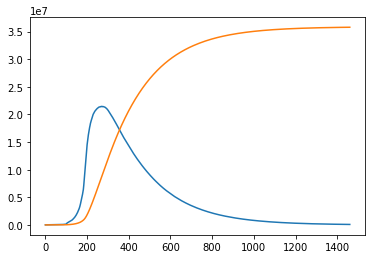

In [37]:
plt.plot(inf)
plt.plot(rec)

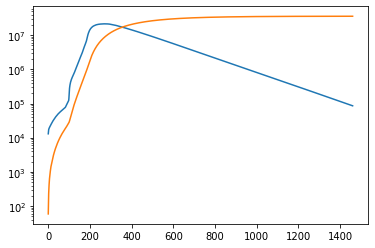

In [41]:
plt.yscale("log")
plt.plot(inf)
plt.plot(rec)